In [ ]:
import numpy as np
weights = np.around(np.random.uniform(size=6), decimals=2)
biases = np.around(np.random.uniform(size=3), decimals=2)


In [1]:
import os
import shutil
from PIL import Image
import numpy as np

# --- Create Sample Data Directories ---
base_dir = 'sample_data'
class1_dir = os.path.join(base_dir, 'class1')
class2_dir = os.path.join(base_dir, 'class2')

os.makedirs(class1_dir, exist_ok=True)
os.makedirs(class2_dir, exist_ok=True)

# --- Function to generate and save random images ---
def generate_random_images(save_dir, num_images):
    for i in range(num_images):
        img = Image.fromarray(np.uint8(np.random.rand(224, 224, 3) * 255))
        img.save(os.path.join(save_dir, f'image_{i}.jpg'))

# --- Generate images ---
num_images_per_class = 100
generate_random_images(class1_dir, num_images_per_class)
generate_random_images(class2_dir, num_images_per_class)

print(f"Sample data generated in '{base_dir}' with {num_images_per_class} images per class.")

# --- Model and Training Setup ---
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top layer, with pretrained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Preprocess image data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train model with frozen base layers
model.fit(train_generator, epochs=10)

# --- Fine-tuning: Unfreeze last 4 layers of base_model ---
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train again (fine-tuning)
model.fit(train_generator, epochs=10)


Sample data generated in 'sample_data' with 100 images per class.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 200 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 110s 17s/step - accuracy: 0.4466 - loss: 3.6862
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 15s/step - accuracy: 0.4772 - loss: 0.8923
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 110s 15s/step - accuracy: 0.5202 - loss: 0.6945
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 148s 16s/step - accuracy: 0.5067 - loss: 0.7024
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 109s 15s/step - accuracy: 0.5135 - loss: 0.6916
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 108s 15s/step - accuracy: 0.5825 - loss: 0.6898
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 107s 15s/step - accuracy: 0.4998 - loss: 0.6910
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 15s/step - accuracy: 0.5812 - loss: 0.6912
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 109s 15s/step - accuracy: 0.7741 - loss: 0.6902
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 17s/step - accuracy: 0.4869 - loss: 0.6902
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 19s/step - accuracy: 0.5521 - loss: 0.6912
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 133s 19s/step - accuracy: 0.5818 - loss

In [ ]:
print(weights)
print(biases)

[0.96 1.   0.76 0.41 0.85 0.68]
[0.87 0.8  0.08]


In [ ]:
x_1 = 0.5
x_2 = 0.85

print('x1 is {} and x2 is {}'.format(x_1,x_2))

x1 is 0.5 and x2 is 0.85


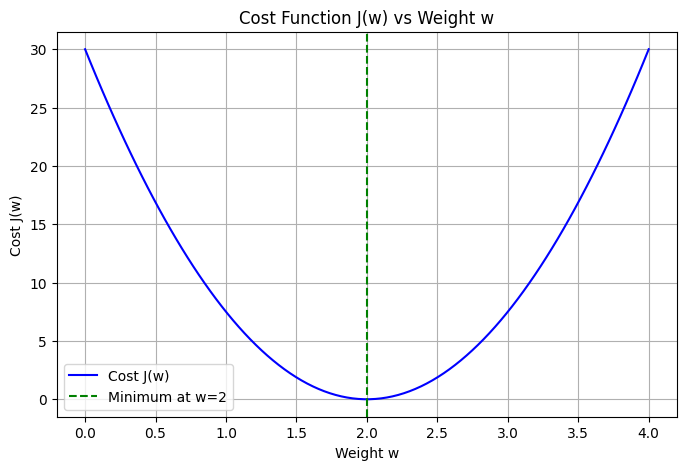

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: z = 2 * x (ideal linear relationship)
x = np.array([1, 2, 3, 4])
z = 2 * x

# Cost function: Mean Squared Error for a given weight w
def compute_cost(w, x, z):
    n = len(x)
    predictions = w * x
    errors = z - predictions
    cost = (1 / n) * np.sum(errors ** 2)
    return cost

# Generate a range of w values
w_values = np.linspace(0, 4, 100)
cost_values = [compute_cost(w, x, z) for w in w_values]

# Plot the cost function
plt.figure(figsize=(8, 5))
plt.plot(w_values, cost_values, label='Cost J(w)', color='blue')
plt.axvline(x=2, color='green', linestyle='--', label='Minimum at w=2')
plt.title("Cost Function J(w) vs Weight w")
plt.xlabel("Weight w")
plt.ylabel("Cost J(w)")
plt.legend()
plt.grid(True)
plt.show()


Epoch: 10000, Average Error: 0.08356
Epoch: 20000, Average Error: 0.03515
Epoch: 30000, Average Error: 0.02548
Epoch: 40000, Average Error: 0.02087
Epoch: 50000, Average Error: 0.01807
Epoch: 60000, Average Error: 0.01613
Epoch: 70000, Average Error: 0.01470
Epoch: 80000, Average Error: 0.01359
Epoch: 90000, Average Error: 0.01269
Epoch: 100000, Average Error: 0.01195
Epoch: 110000, Average Error: 0.01132
Epoch: 120000, Average Error: 0.01077
Epoch: 130000, Average Error: 0.01030
Epoch: 140000, Average Error: 0.00989
Epoch: 150000, Average Error: 0.00952
Epoch: 160000, Average Error: 0.00919
Epoch: 170000, Average Error: 0.00889
Epoch: 180000, Average Error: 0.00861


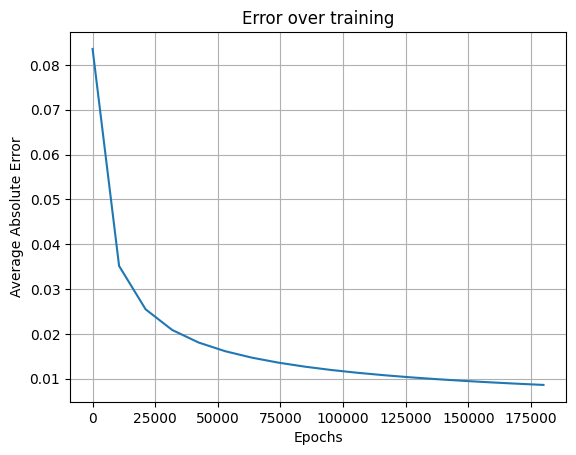


Final Predictions:
[[0.01  0.992 0.992 0.008]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Network parameters
inputSize = 2      # Number of input neurons (x1, x2)
hiddenSize = 2     # Number of hidden neurons
outputSize = 1     # Number of output neurons
lr = 0.1           # Learning rate
epochs = 180000    # Number of training epochs

# Initialize weights and biases
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

# Input data: XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # Shape: (2, 4)
d = np.array([[0, 1, 1, 0]])  # Expected output (shape: 1x4)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
error_list = []

for epoch in range(epochs):
    # ---------- FORWARD PASS ----------
    z1 = np.dot(w1, X) + b1                # Weighted sum at hidden layer
    a1 = sigmoid(z1)                       # Activation at hidden layer

    z2 = np.dot(w2, a1) + b2               # Weighted sum at output layer
    a2 = sigmoid(z2)                       # Final output (prediction)

    # ---------- BACKWARD PASS ----------
    error = d - a2                         # Error at output
    dz2 = error * sigmoid_derivative(a2)   # Gradient for output layer

    da1 = np.dot(w2.T, dz2)               # Backpropagate to hidden layer
    dz1 = da1 * sigmoid_derivative(a1)     # Gradient for hidden layer

    # ---------- WEIGHT & BIAS UPDATES ----------
    w2 += lr * np.dot(dz2, a1.T)          # Update hidden-to-output weights
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update output bias

    w1 += lr * np.dot(dz1, X.T)           # Update input-to-hidden weights
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update hidden bias

    # ---------- LOGGING ----------
    if (epoch + 1) % 10000 == 0:
        avg_error = np.mean(np.abs(error))
        print(f"Epoch: {epoch + 1}, Average Error: {avg_error:.5f}")
        error_list.append(avg_error)

# ---------- PLOT ERROR ----------
plt.plot(np.linspace(0, epochs, len(error_list)), error_list)
plt.title("Error over training")
plt.xlabel("Epochs")
plt.ylabel("Average Absolute Error")
plt.grid(True)
plt.show()

# ---------- FINAL OUTPUT ----------
print("\nFinal Predictions:")
z1 = np.dot(w1, X) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)
print(np.round(a2, 3))


In [ ]:
import numpy as np
strR = np.random.rand(2, 2)
print(strR)


[[0.88262342 0.50626009]
 [0.05070061 0.39808929]]


In [ ]:
print(np.random.rand(2, 1) * 2 - 1)

[[-0.01575056]
 [-0.02566107]]


In [ ]:
import pandas as pd
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data_columns = concrete_data.columns

In [ ]:
print(concrete_data_columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


In [ ]:
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength'] # Strength column

In [ ]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [ ]:
n_cols = predictors_norm.shape[1] # number of predictors
print(n_cols)

8


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [ ]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# build the model
model = regression_model()

In [ ]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - 57ms/step - loss: 1662.5548 - val_loss: 1155.4537
Epoch 2/100
23/23 - 0s - 19ms/step - loss: 1545.7875 - val_loss: 1041.2213
Epoch 3/100
23/23 - 0s - 5ms/step - loss: 1357.1324 - val_loss: 858.0930
Epoch 4/100
23/23 - 0s - 6ms/step - loss: 1060.6354 - val_loss: 608.4807
Epoch 5/100
23/23 - 0s - 5ms/step - loss: 691.5031 - val_loss: 365.2140
Epoch 6/100
23/23 - 0s - 6ms/step - loss: 390.1873 - val_loss: 220.7759
Epoch 7/100
23/23 - 0s - 7ms/step - loss: 264.8801 - val_loss: 183.1088
Epoch 8/100
23/23 - 0s - 21ms/step - loss: 232.9168 - val_loss: 176.3739
Epoch 9/100
23/23 - 0s - 19ms/step - loss: 219.1705 - val_loss: 171.7808
Epoch 10/100
23/23 - 0s - 12ms/step - loss: 208.1054 - val_loss: 168.6609
Epoch 11/100
23/23 - 0s - 6ms/step - loss: 199.8610 - val_loss: 162.7191
Epoch 12/100
23/23 - 0s - 6ms/step - loss: 193.2867 - val_loss: 162.9942
Epoch 13/100
23/23 - 0s - 13ms/step - loss: 185.3451 - val_loss: 159.2256
Epoch 14/100
23/23 - 0s - 12ms/step - loss: 179.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.3515 - val_loss: 0.1619
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.1520 - val_loss: 0.1268
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1225 - val_loss: 0.1087
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1066 - val_loss: 0.0974
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0966 - val_loss: 0.0901
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0896 - val_loss: 0.0851
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0850 - val_loss: 0.0817
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0818 - val_loss: 0.0793
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0796 - val_loss: 0.0776
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0780 - val_loss: 0.0764
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0767 - val_los

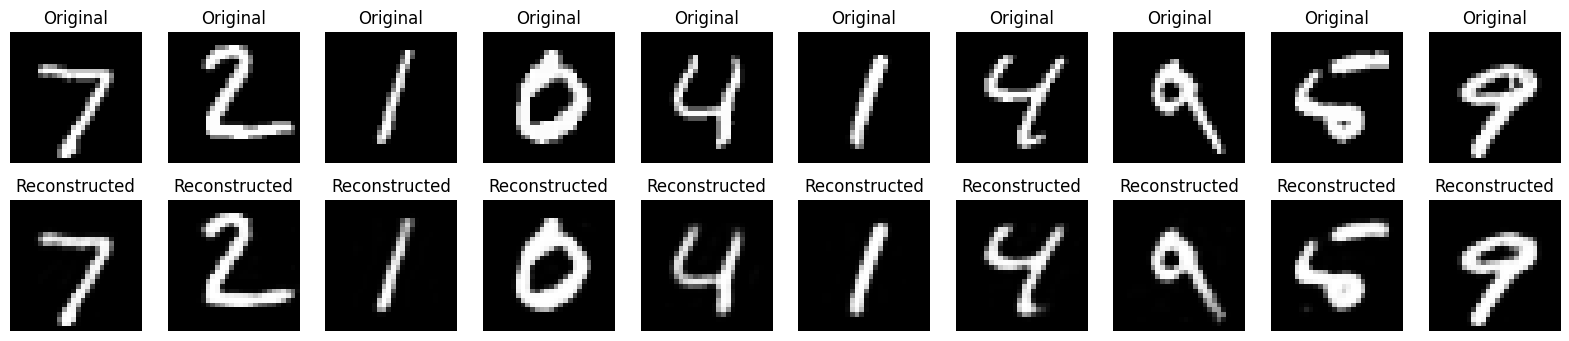

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

# 1. Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1] and flatten them
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# 2. Define the autoencoder architecture
input_dim = x_train.shape[1]  # 784
encoding_dim = 64  # Size of the encoded representations

# Input placeholder
input_img = Input(shape=(input_dim,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# 3. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 5. Use the trained autoencoder to reconstruct images
decoded_imgs = autoencoder.predict(x_test)

# 6. Visualize the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [ ]:
print(x_train.shape)                # Output: (60000, 28, 28)
x_train_flat = x_train.reshape((len(x_train), 28 * 28))
print(x_train_flat.shape)           # Output: (60000, 784)
print(x_train[0])              # Prints the flattened pixel values of the first image


(60000, 28, 28)
(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 1

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
# print(x_train.astype('float32') / 255.)

print(x_train[0].astype('float32') / 255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    